<a href="https://colab.research.google.com/github/DengBoCong/DeepLearning-Self/blob/master/TensorFlow-Tutorials/TensorFlow%E8%AF%8D%E5%B5%8C%E5%85%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8185
Epoch 1/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.5094 - accuracy: 0.6920 - val_loss: 0.3444 - val_accuracy: 0.8450
Epoch 2/10
2500/2500 [==============================] - 14s 6ms/step - loss: 0.2875 - accuracy: 0.8808 - val_loss: 0.3616 - val_accuracy: 0.8650
Epoch 3/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2316 - accuracy: 0.9092 - val_loss: 0.3141 - val_accuracy: 0.8250
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2014 - accuracy: 0.9232 - val_loss: 0.3955 - val_accuracy: 0.8550
Epoch 5/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.1737 - accuracy: 0.9338 - val_loss: 0.4720 - val_accuracy: 0.8300
Epoch 6/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.1579 - accuracy: 0.9408 - val_loss: 0.4002 - val_accuracy: 0.8450
Epoch 7/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.1439 - accuracy: 0.9487 - val_loss: 0.4722 - v

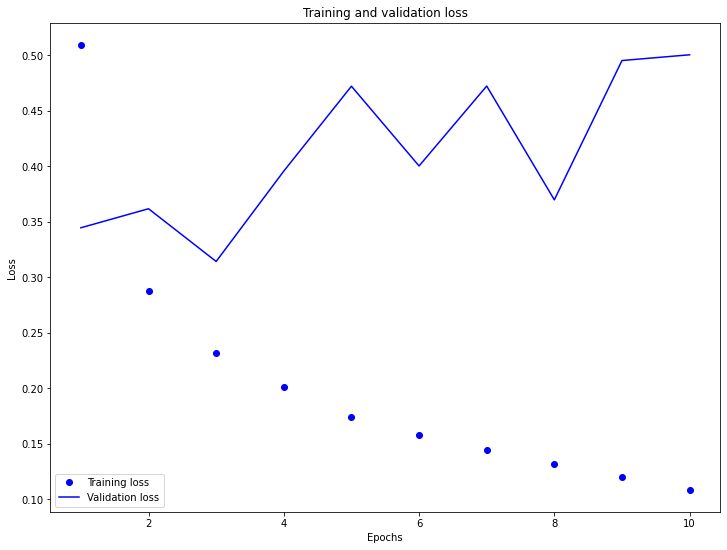

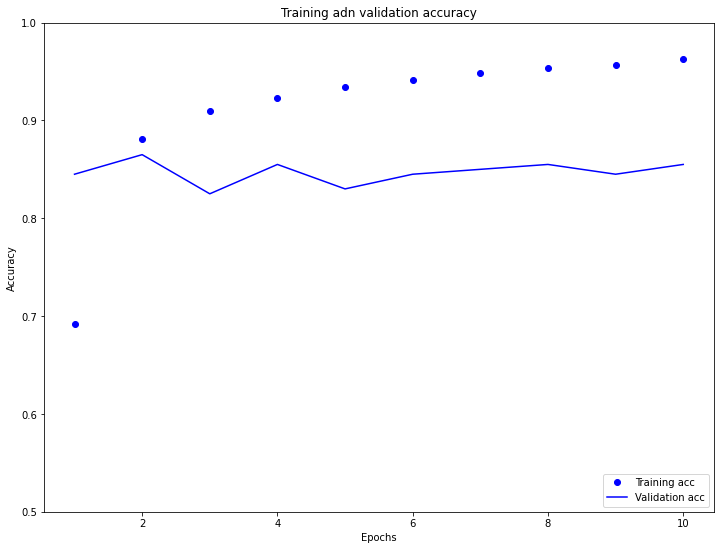

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds

tfds.disable_progress_bar()

(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                      split=(tfds.Split.TRAIN, tfds.Split.TEST),
                      with_info=True, as_supervised=True)

# print(train_data)
# print(test_data)
# print(info)

encoder = info.features['text'].encoder
encoder.subwords[:20]

print(encoder.vocab_size)

train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

train_batch, train_labels = next(iter(train_batches))
# print(train_batch.shape)
# print(train_labels.shape)
# train_batch.numpy()
embedding_dim = 16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

# model.summary()
model.compile(optimizer='adam',
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = model.fit(
  train_batches,
  epochs=10,
  validation_data=test_batches, validation_steps=20
)
print(history.history)
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training adn validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5, 1))
plt.show()
